In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
# Plot charts without calling 

%matplotlib inline

In [3]:
#create string for the path 

path = r'C:\Users\kilia\OneDrive\CareerFoundry\Projects\Data Immersion Course\Achievement 6\Berlin_AirBnB Analysis\02 Data\Prepared Data'
path1 =r'C:\Users\kilia\OneDrive\CareerFoundry\Projects\Data Immersion Course\Achievement 6\Berlin_AirBnB Analysis\04 Analysis\Visualizations'


In [4]:
# define column types
dtype_options = {'15':str}

In [5]:
# Import data

df = pd.read_csv(os.path.join(path,'3.0 AirBnB_categorical columns.csv'), index_col = 0)

C:\Users\kilia\AppData\Local\Temp\ipykernel_301884\1339579203.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,'3.0 AirBnB_categorical columns.csv'), index_col = 0)


In [6]:
# Display all columns 

pd.set_option('display.max_columns', None)

In [7]:
df.head(20)

,Review ID,Review_Date,Reviewer ID,Rating_Comment,Listing ID,Listing Name,Host ID,Host Since,Host Response Time,Host Response Rate,Is Superhost,Neighborhood,Neighborhood Group,City,Postal Code,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Price category,Rating Category,Accomodation Size
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,58660447,2016-01-03,14876562,"Very nice, clean appartement! Josh was really ...",10002699,Trendy and peaceful Kreuzkölln,44696672,2015-09-20,NaN,NaN,False,Neukölln,Neukölln,Berlin,12047.0,Germany,52.49234,13.42994,Apartment,Entire home/apt,4,1.0,2.0,2.0,60.0,1,1,1,2016-01-03,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,False,Middle price,Good Rating,Couple Accomodation
2,58663795,2016-01-03,49367757,Aki is really nice and friendly. We had an ama...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
3,59003619,2016-01-05,46694292,Aki is a very nice dude with a clean place in ...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
4,66845661,2016-03-25,54542819,Aki's place was easy to find and located in th...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
5,67969785,2016-04-01,35352843,We had to wait 30mins for Aki to arrive but ot...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
6,68816282,2016-04-06,48006291,"Great room, very comfortable and clean. Aki an...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
7,69289363,2016-04-10,63759402,Aki was really friendly and available giving u...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
8,69780867,2016-04-13,53960263,Aki es sin duda el mejor host q uno puede tene...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
9,70426866,2016-04-17,26184931,"We did not meer Aki, but we did meet FabiÃ¡n, ...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation


In [8]:
df.shape

(452805, 41)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452805 entries, 0 to 456960
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Review ID             452805 non-null  int64  
 1   Review_Date           452805 non-null  object 
 2   Reviewer ID           452805 non-null  int64  
 3   Rating_Comment        452597 non-null  object 
 4   Listing ID            452805 non-null  int64  
 5   Listing Name          452622 non-null  object 
 6   Host ID               452805 non-null  int64  
 7   Host Since            452767 non-null  object 
 8   Host Response Time    396841 non-null  object 
 9   Host Response Rate    396841 non-null  float64
 10  Is Superhost          452805 non-null  bool   
 11  Neighborhood          452805 non-null  object 
 12  Neighborhood Group    452805 non-null  object 
 13  City                  452805 non-null  object 
 14  Postal Code           445219 non-null  object 
 15  

In [10]:
df.columns

Index(['Review ID', 'Review_Date', 'Reviewer ID', 'Rating_Comment',
       'Listing ID', 'Listing Name', 'Host ID', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'Neighborhood', 'Neighborhood Group', 'City', 'Postal Code', 'Country',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accomodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included',
       'Min Nights', 'Reviews', 'First Review', 'Last Review',
       'Overall Rating', 'Accuracy Rating', 'Cleanliness Rating',
       'Checkin Rating', 'Communication Rating', 'Location Rating',
       'Value Rating', 'Instant Bookable', 'Price category', 'Rating Category',
       'Accomodation Size'],
      dtype='object')

# Elbow technique

In [11]:
# create a list with columns for subset
columns_subset = ['Host Response Rate', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included',
                  'Min Nights', 'Reviews','Overall Rating', 'Accuracy Rating', 'Cleanliness Rating', 
                  'Checkin Rating', 'Communication Rating', 'Location Rating','Value Rating']

In [12]:
# Create Subset only with needed variables 

df_sub = df[columns_subset]

In [13]:
df_sub.head(20)

,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
index,,,,,,,,,,,,,,,,
0,NaN,4,1.0,2.0,2.0,60.0,1,1,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0
2,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
3,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
4,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
5,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
6,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
7,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
8,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
9,100.0,2,1.0,1.0,1.0,35.0,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0


In [14]:
# Standardizing the data

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_sub)

In [15]:
# Create dataframe with standardized data

df_stand = pd.DataFrame(standardized_data, columns=columns_subset)

In [16]:
df_stand.head(10)

,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
0,NaN,0.461843,-0.293437,1.086508,0.055519,-0.108311,-0.532725,-0.244163,-1.065583,1.234215,-3.738405,0.728899,-8.688031,0.43697,0.683327,0.993563
1,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640
2,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640
3,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640
4,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640
5,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640
6,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640
7,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640
8,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640
9,0.333236,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640


In [17]:
df_stand.shape

(452805, 16)

In [18]:
df_stand.isnull().sum()

Host Response Rate      55964
Accomodates                 0
Bathrooms                 937
Bedrooms                  709
Beds                       72
Price                       0
Guests Included             0
Min Nights                  0
Reviews                     0
Overall Rating            565
Accuracy Rating           598
Cleanliness Rating        596
Checkin Rating            619
Communication Rating      602
Location Rating           621
Value Rating              622
dtype: int64

In [19]:
#Imputing missig values with mean values
Response_mean = df_stand['Host Response Rate'].mean()
Bathrooms_mean = df_stand['Bathrooms'].mean()
Bedrooms_mean = df_stand['Bedrooms'].mean()
Beds_mean = df_stand['Beds'].mean()
Overall_Rating_mean = df_stand['Overall Rating'].mean()
Accuracy_Rating_mean = df_stand['Accuracy Rating'].mean()
Cleanliness_Rating_mean = df_stand['Cleanliness Rating'].mean()
Checkin_Rating_mean = df_stand['Checkin Rating'].mean()
Communication_Rating_mean = df_stand['Communication Rating'].mean()
Location_Rating_mean = df_stand['Location Rating'].mean()
Value_Rating_mean = df_stand['Value Rating'].mean()

In [20]:
df_stand['Host Response Rate'] = df_stand['Host Response Rate'].fillna(Response_mean)
df_stand['Bathrooms'] = df_stand['Bathrooms'].fillna(Bathrooms_mean)
df_stand['Bedrooms'] = df_stand['Bedrooms'].fillna(Bedrooms_mean)
df_stand['Beds'] = df_stand['Beds'].fillna(Beds_mean)
df_stand['Overall Rating'] = df_stand['Overall Rating'].fillna(Overall_Rating_mean)
df_stand['Accuracy Rating'] = df_stand['Accuracy Rating'].fillna(Accuracy_Rating_mean)
df_stand['Cleanliness Rating'] = df_stand['Cleanliness Rating'].fillna(Cleanliness_Rating_mean)
df_stand['Checkin Rating'] = df_stand['Checkin Rating'].fillna(Checkin_Rating_mean)
df_stand['Communication Rating'] = df_stand['Communication Rating'].fillna(Communication_Rating_mean)
df_stand['Location Rating'] = df_stand['Location Rating'].fillna(Location_Rating_mean)
df_stand['Value Rating'] = df_stand['Value Rating'].fillna(Value_Rating_mean)

In [21]:
df_stand.isnull().sum() # all missing value imputed 

Host Response Rate      0
Accomodates             0
Bathrooms               0
Bedrooms                0
Beds                    0
Price                   0
Guests Included         0
Min Nights              0
Reviews                 0
Overall Rating          0
Accuracy Rating         0
Cleanliness Rating      0
Checkin Rating          0
Communication Rating    0
Location Rating         0
Value Rating            0
dtype: int64

In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(df_stand).score(df_stand) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

D:\Anaconda_main\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda_main\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda_main\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda_main\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda_main\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

[-7182974.999999567,
 -6012585.390852352,
 -5186833.784140402,
 -4862365.592966198,
 -4598926.94823889,
 -4402899.222743468,
 -4163561.441562514,
 -3963479.292146936,
 -3902468.167447981]

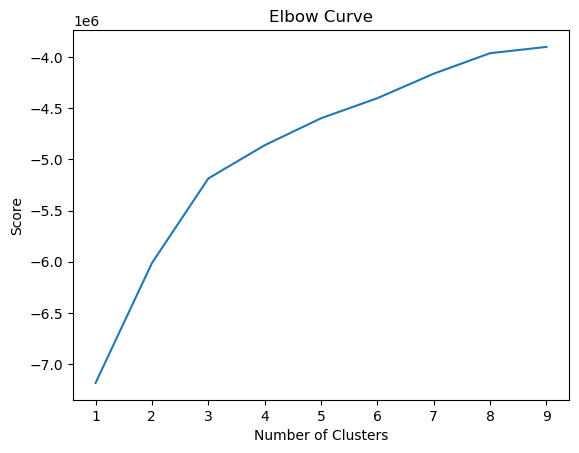

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Looks like three is the best amount of clusters 

# k-means clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_stand)

D:\Anaconda_main\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
df_stand['clusters'] = kmeans.fit_predict(df_stand)

D:\Anaconda_main\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
df_stand.head()

,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,clusters
0,4.751980e-16,0.461843,-0.293437,1.086508,0.055519,-0.108311,-0.532725,-0.244163,-1.065583,1.234215,-3.738405,0.728899,-8.688031,0.43697,0.683327,0.993563,2
1,3.332363e-01,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640,2
2,3.332363e-01,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640,2
3,3.332363e-01,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640,2
4,3.332363e-01,-0.573665,-0.293437,-0.300738,-0.598923,-0.412216,-0.532725,-0.244163,-0.868840,-0.584059,-1.625157,-2.203015,-1.839096,0.43697,0.683327,-0.739640,2


In [29]:
df_stand['clusters'].value_counts()

1    313961
2     91073
0     47771
Name: clusters, dtype: int64

In [30]:
df_stand['Price'].min()

-0.8376838921779299

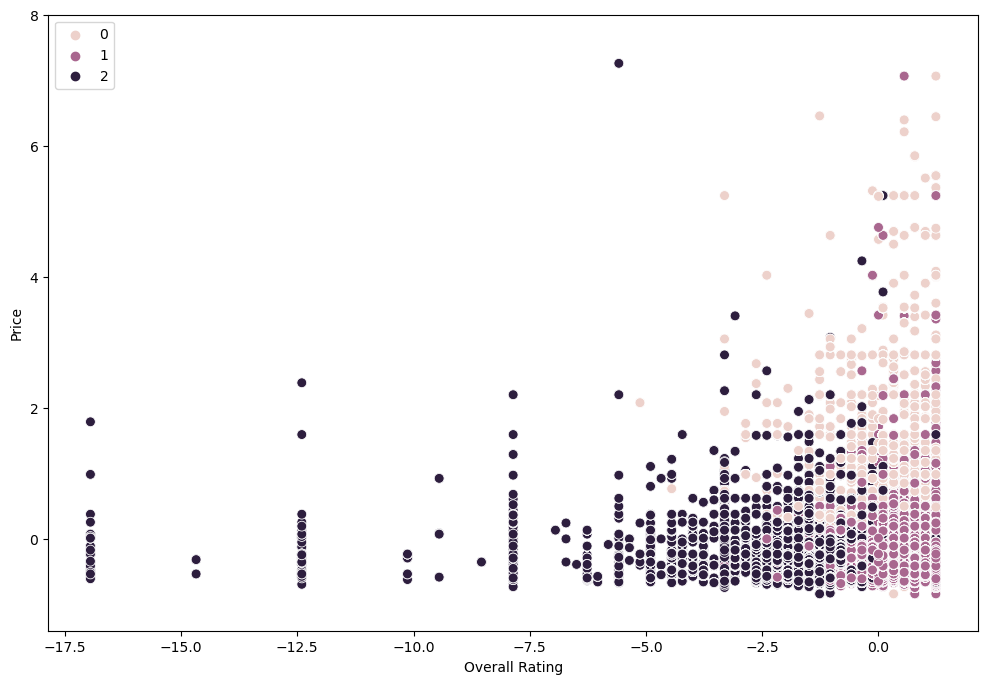

In [31]:
# Plot the clusters for the "Price" and "Overall Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Overall Rating'], y=df_stand['Price'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Overall Rating') # Label x-axis.
plt.ylabel('Price') # Label y-axis.

# Set max/min for Y Axis
y_min = -1.4
y_max = 8
ax.set_ylim(y_min, y_max)


plt.show()

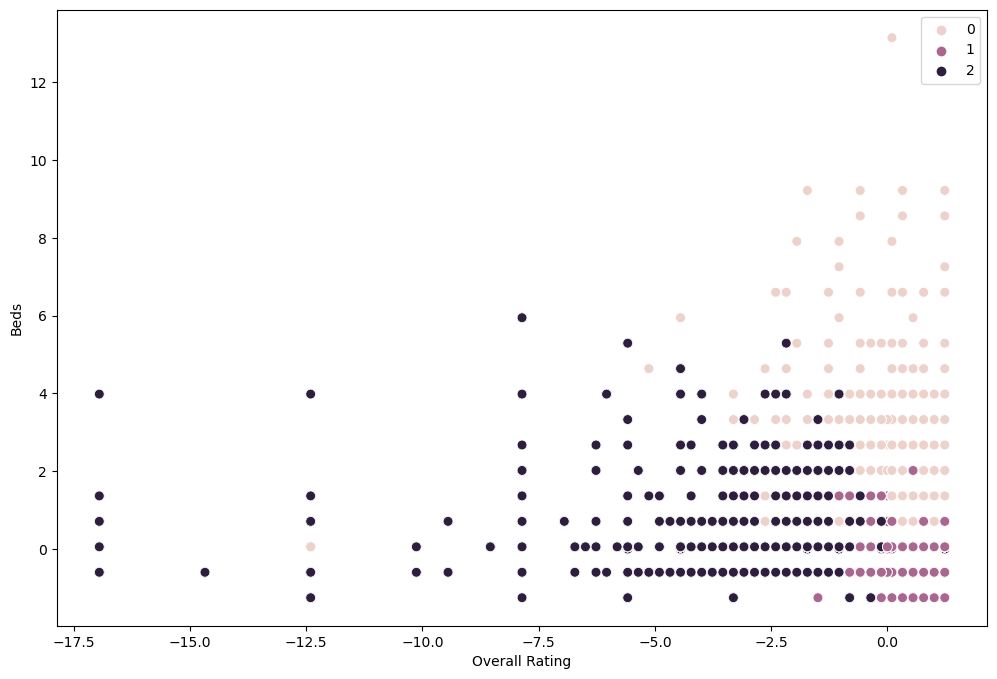

In [32]:
# Plot the clusters for the "Overall Rating" and "Beds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Overall Rating'], y=df_stand['Beds'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Overall Rating') 
plt.ylabel('Beds') 
plt.show()

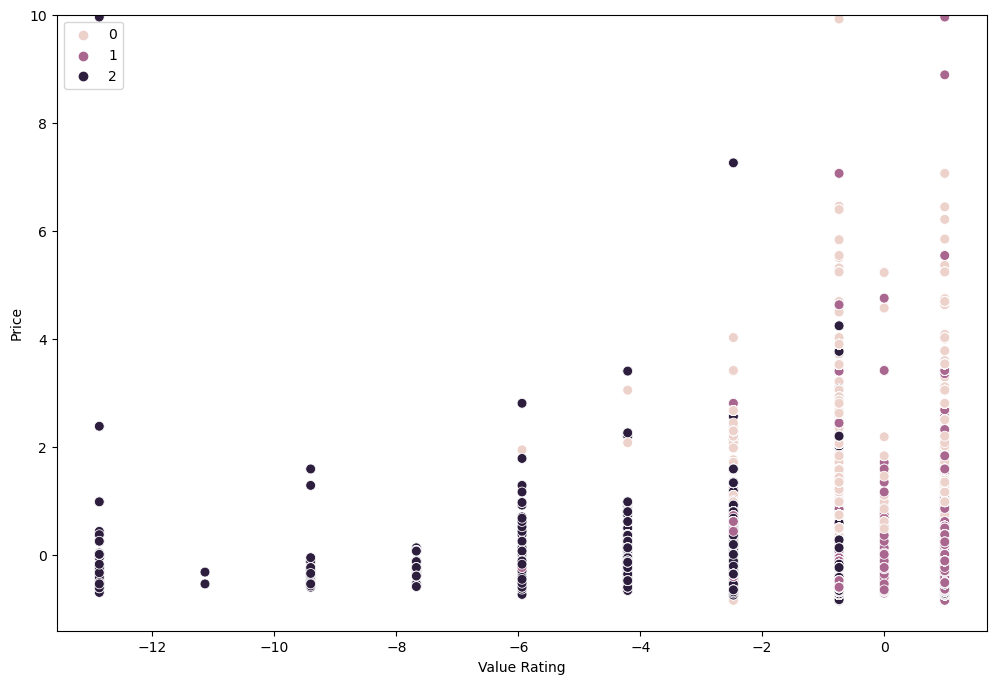

In [33]:
# Plot the clusters for the "Value Rating" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Value Rating'], y=df_stand['Price'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Value Rating') 
plt.ylabel('Price') 


# Set max/min for Y Axis
y_min = -1.4
y_max = 10
ax.set_ylim(y_min, y_max)


plt.show()

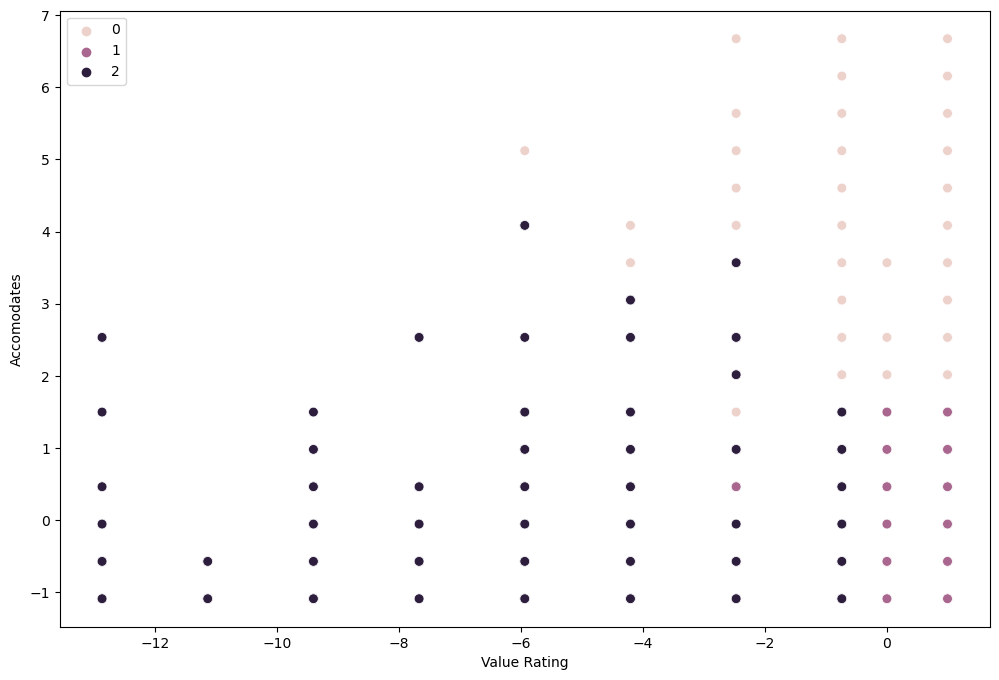

In [40]:
# Plot the clusters for the "Value Rating" and "Beds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Value Rating'], y=df_stand['Accomodates'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Value Rating') 
plt.ylabel('Accomodates') 


plt.show()

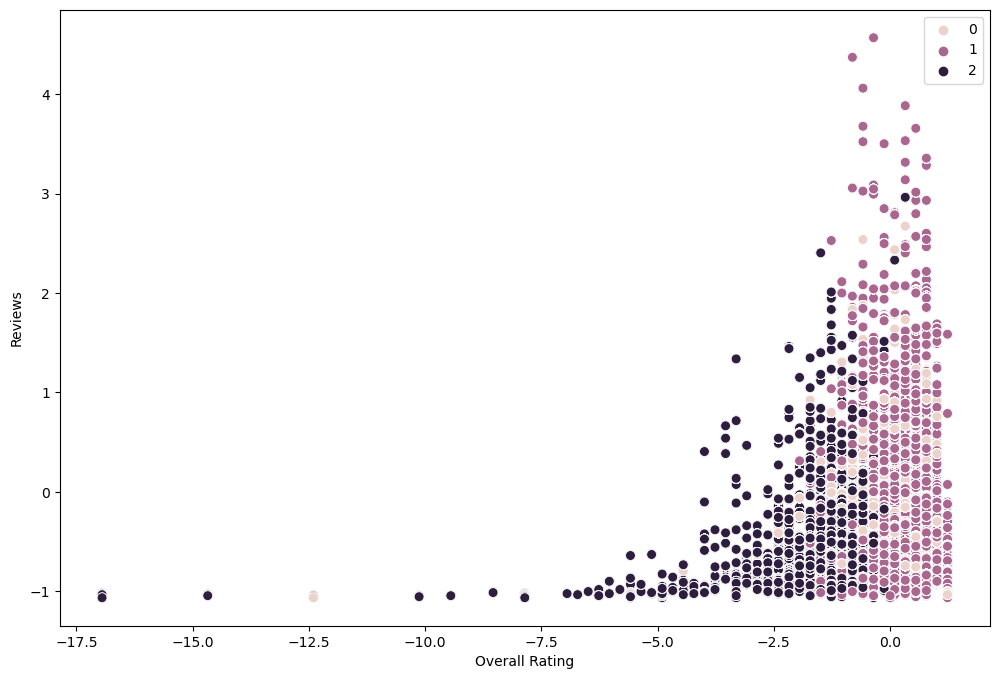

In [35]:
# Plot the clusters for the "Overall Rating" and "Reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Overall Rating'], y=df_stand['Reviews'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Overall Rating') 
plt.ylabel('Reviews') 


plt.show()

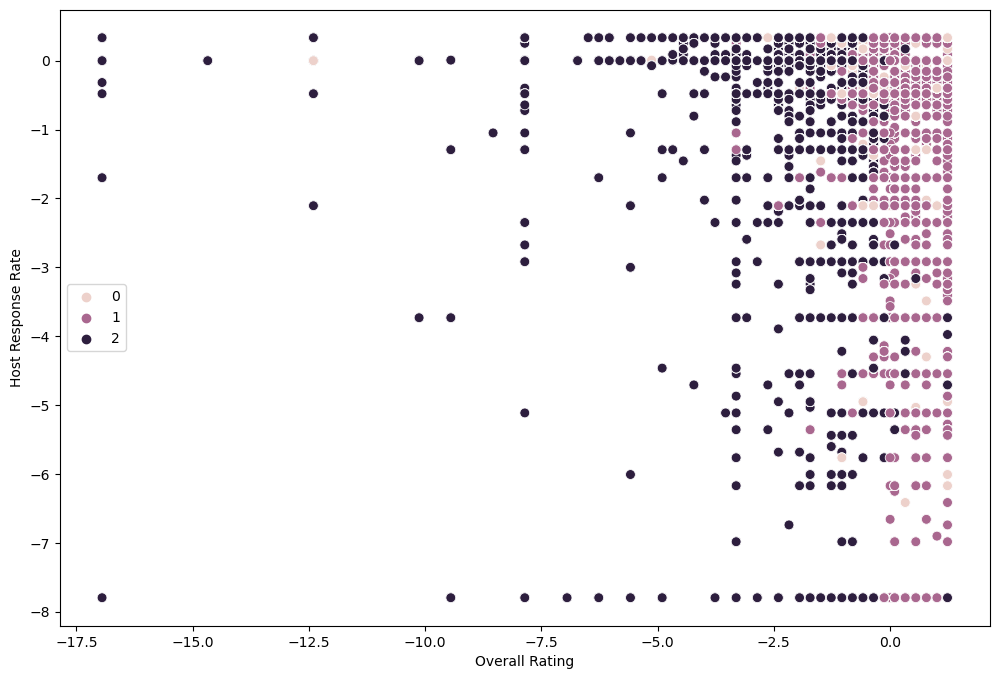

In [36]:
# Plot the clusters for the "Overall Rating" and "Host Response Rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Overall Rating'], y=df_stand['Host Response Rate'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Overall Rating') 
plt.ylabel('Host Response Rate') 


plt.show()

### The only usefull insight the clusters give is that higher price also means much higher chance for high Overall Rating. On the Cluster 2 with only higher prices the overall rating hasn't many bad ratings. On the cluster 0 there are a lot of bad ratings. The Cluster 1 looks like a cluster with small accomodations/private rooms they have good ratings overall.

# Grouping the data

In [37]:
df_stand.loc[df_stand['clusters'] == 2, 'cluster'] = 'dark purple'
df_stand.loc[df_stand['clusters'] == 1, 'cluster'] = 'purple'
df_stand.loc[df_stand['clusters'] == 0, 'cluster'] = 'pink'

In [39]:
df_stand.groupby('cluster').agg({'Host Response Rate': ['mean', 'median'], 'Accomodates': ['mean', 'median'], 
                           'Bathrooms': ['mean', 'median'], 'Bedrooms': ['mean', 'median'], 'Beds': ['mean', 'median'], 
                           'Price': ['mean', 'median'], 'Guests Included': ['mean', 'median'],'Min Nights': ['mean', 'median'],
                           'Reviews': ['mean', 'median'],'Overall Rating': ['mean', 'median'], 
                           'Accuracy Rating': ['mean', 'median'], 'Cleanliness Rating': ['mean', 'median'], 
                           'Checkin Rating': ['mean', 'median'], 'Communication Rating': ['mean', 'median'], 
                           'Location Rating': ['mean', 'median'],'Value Rating': ['mean', 'median']})

Host Response Rate           Accomodates           Bathrooms  \
                          mean    median        mean    median      mean   
cluster                                                                    
dark purple          -0.188414  0.333236    0.070673 -0.055911 -0.140556   
pink                  0.144834  0.333236    1.953555  1.497351  1.204948   
purple                0.032617  0.333236   -0.317745 -0.573665 -0.142568   

                       Bedrooms                Beds               Price  \
               median      mean    median      mean    median      mean   
cluster                                                                   
dark purple -0.293437 -0.136815 -0.300738  0.079015  0.055519 -0.102815   
pink        -0.293437  1.912101  1.086508  1.875970  1.364401  1.230948   
purple      -0.293437 -0.251250 -0.300738 -0.308360 -0.598923 -0.157472   

                      Guests Included           Min Nights            \
               median            mean    median       mean    median   
cluster                                                                
dark purple -0.217717       -0.064351 -0.532725  -0.020960 -0.181495   
pink         0.864186        1.721301  2.248719  -0.089464 -0.118827   
purple      -0.229873       -0.243239 -0.532725   0.019692 -0.181495   

              Reviews           Overall Rating           Accuracy Rating  \
                 mean    median           mean    median            mean   
cluster                                                                    
dark purple -0.170748 -0.371805      -1.304180 -1.038628       -1.383706   
pink         0.068000 -0.061157       0.059646  0.097794        0.130975   
purple       0.039184 -0.299320       0.369238  0.552363        0.381453   

                      Cleanliness Rating           Checkin Rating            \
               median               mean    median           mean    median   
cluster                                                                       
dark purple -1.625157          -1.087583 -0.737058      -1.167433 -1.839096   
pink         0.488091           0.144603  0.728899       0.144870  0.443882   
purple       0.488091           0.293481  0.728899       0.316603  0.443882   

            Communication Rating           Location Rating            \
                            mean    median            mean    median   
cluster                                                                
dark purple            -1.286152 -1.822286       -0.557875 -1.209770   
pink                    0.132043  0.436970       -0.113225  0.683327   
purple                  0.352992  0.436970        0.179055  0.683327   

            Value Rating            
                    mean    median  
cluster                             
dark purple    -0.957284 -0.739640  
pink           -0.265205 -0.739640  
purple          0.318039  0.993563

# Dark Purple Cluster(High Prices/big Accomodation): 
## has the best stats in almost all categories. The ratings are much better than the pink custer ratings but a little bit worse than the purple cluster ratings. They also can accomodate more people in general.
# Pink Cluster(Medium Prices/Medium Accomodation): 
## has by far the worst ratings, also the least amount of reviews. 
# Purple Cluster(Low Price/Small Accomodation/private rooms): 
## has the lowest prices and the best ratings overall. But it seems you also have to stay the longest time to be able to book the listings. As the Min Night suggests. They are also by far the smallest accomodations. I guess that are mostly private rooms with shares bathroom and kitchen. The high mean of min nights could be an indication for long time listings that are only able to book for a whole week/month

In [ ]:
# Export the dataset

df_stand.to_excel('4.0 AirBnB with cluster and categories.xlsx', index=False)